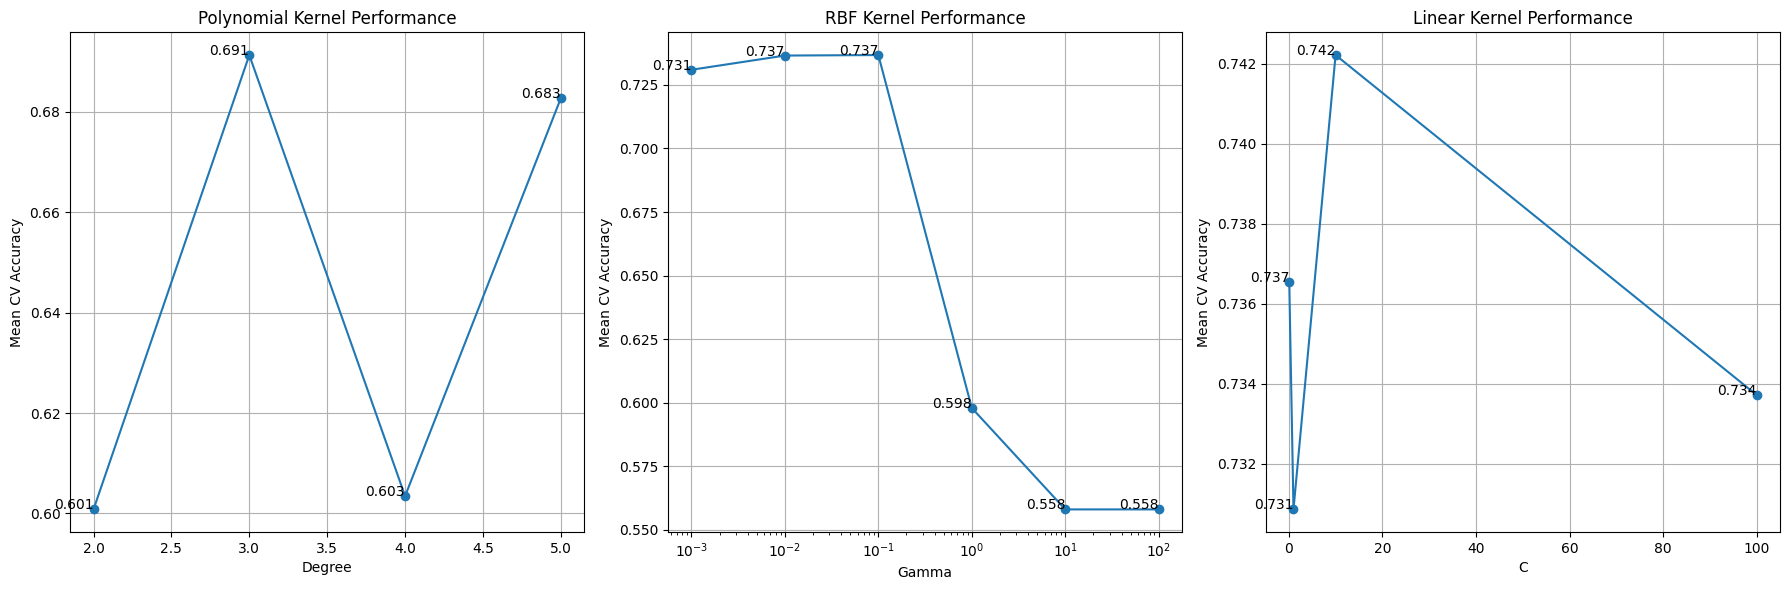

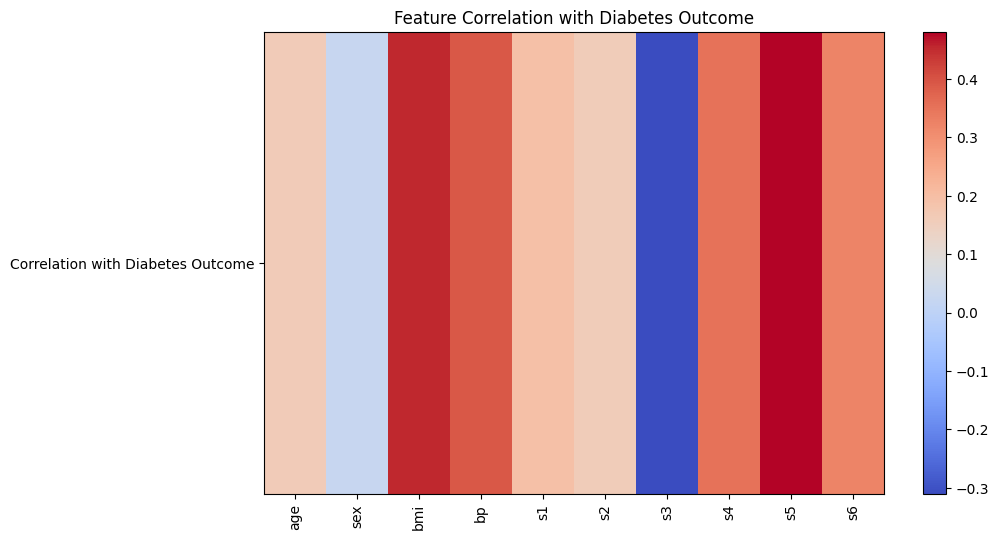

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
data = load_diabetes()
X = data.data
y = (data.target > np.mean(data.target)).astype(int)  # Classifying as diabetic or not

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter ranges for GridSearch
param_grid_poly = {'degree': [2, 3, 4, 5]}
param_grid_rbf = {'gamma': np.logspace(-3, 2, 6)}
param_grid_linear = {'C': [0.1, 1, 10, 100]}  # C is the regularization parameter for linear kernel

# SVM with polynomial kernel
svm_poly = SVC(kernel='poly', random_state=42)
grid_poly = GridSearchCV(svm_poly, param_grid_poly, cv=5)
grid_poly.fit(X_train_scaled, y_train)

# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
grid_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5)
grid_rbf.fit(X_train_scaled, y_train)

# SVM with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
grid_linear = GridSearchCV(svm_linear, param_grid_linear, cv=5)
grid_linear.fit(X_train_scaled, y_train)

# Extracting results
poly_results = pd.DataFrame(grid_poly.cv_results_)
rbf_results = pd.DataFrame(grid_rbf.cv_results_)
linear_results = pd.DataFrame(grid_linear.cv_results_)

# Plotting the results
plt.figure(figsize=(18, 6))

# Plot for polynomial kernel
plt.subplot(1, 3, 1)
plt.plot(poly_results['param_degree'], poly_results['mean_test_score'], marker='o')
for i, txt in enumerate(poly_results['mean_test_score']):
    plt.text(poly_results['param_degree'][i], poly_results['mean_test_score'][i], str(round(txt, 3)), ha='right')
plt.title('Polynomial Kernel Performance')
plt.xlabel('Degree')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)

# Plot for RBF kernel
plt.subplot(1, 3, 2)
plt.plot(rbf_results['param_gamma'], rbf_results['mean_test_score'], marker='o')
for i, txt in enumerate(rbf_results['mean_test_score']):
    plt.text(rbf_results['param_gamma'][i], rbf_results['mean_test_score'][i], str(round(txt, 3)), ha='right')
plt.xscale('log')
plt.title('RBF Kernel Performance')
plt.xlabel('Gamma')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)

# Plot for linear kernel
plt.subplot(1, 3, 3)
plt.plot(linear_results['param_C'], linear_results['mean_test_score'], marker='o')
for i, txt in enumerate(linear_results['mean_test_score']):
    plt.text(linear_results['param_C'][i], linear_results['mean_test_score'][i], str(round(txt, 3)), ha='right')
plt.title('Linear Kernel Performance')
plt.xlabel('C')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

# Analyzing feature importance through feature correlation with the target
feature_corr = pd.DataFrame(X, columns=data.feature_names).corrwith(pd.Series(y))

# Plotting feature correlations as a heatmap
plt.figure(figsize=(10, 6))
hm_data = pd.DataFrame({'Features': data.feature_names, 'Correlation': feature_corr})
hm_data = hm_data.set_index('Features')
hm_data = hm_data.T
plt.imshow(hm_data, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(data.feature_names)), data.feature_names, rotation=90)
plt.yticks([0], ['Correlation with Diabetes Outcome'])
plt.title('Feature Correlation with Diabetes Outcome')
plt.show()


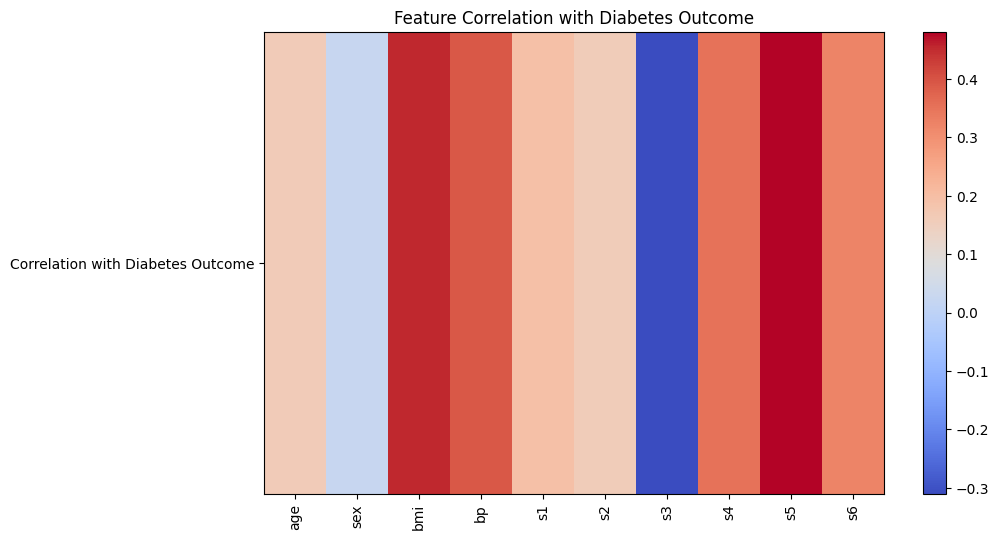

In [2]:
# Analyzing feature importance through feature correlation with the target
feature_corr = pd.DataFrame(X, columns=data.feature_names).corrwith(pd.Series(y))

# Plotting feature correlations as a heatmap
plt.figure(figsize=(10, 6))
hm_data = pd.DataFrame({'Features': data.feature_names, 'Correlation': feature_corr})
hm_data = hm_data.set_index('Features')
hm_data = hm_data.T
plt.imshow(hm_data, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(data.feature_names)), data.feature_names, rotation=90)
plt.yticks([0], ['Correlation with Diabetes Outcome'])
plt.title('Feature Correlation with Diabetes Outcome')
plt.show()


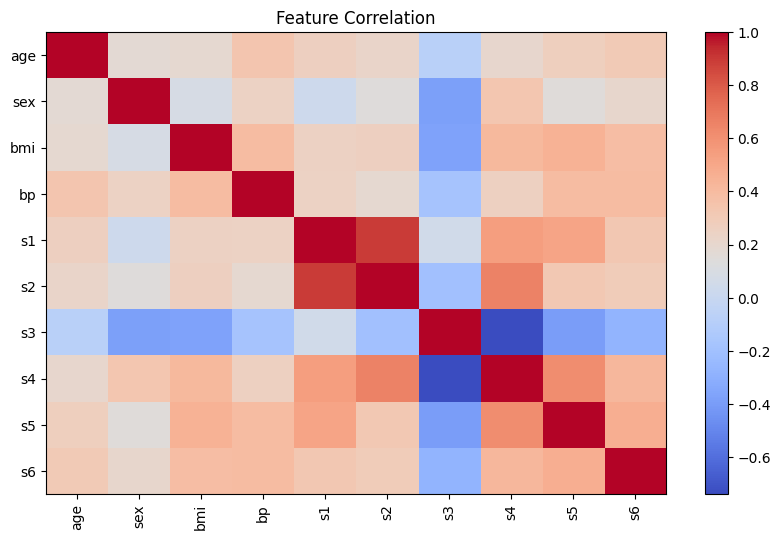

In [3]:
# Calculate the correlation matrix of features
feature_corr_matrix = pd.DataFrame(X, columns=data.feature_names).corr()

# Plotting feature correlations as a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(feature_corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(data.feature_names)), data.feature_names, rotation=90)
plt.yticks(np.arange(len(data.feature_names)), data.feature_names)
plt.title('Feature Correlation')
plt.show()
